[download scrobbles from this webapp](https://mainstream.ghan.nl/export.html)

In [1]:
import pandas as pd
from datetime import datetime as dt

In [2]:
import numpy as np

In [3]:
import os

if not os.path.exists('scrobbles.pkl'):
    t = pd.read_json("scrobbles-whitestriper1-1559431603.json")
    scrobbles = dict(artist=[], song=[], time=[], album=[])

    for i in range(t.shape[0]): 
        for j in range(t.shape[1]):
            if t.iloc[i, j] is not None: 
                scrobble = t.iloc[i, j]
                artist = scrobble.get('artist')
                song = scrobble.get('name')
                date = scrobble.get('date')
                album = scrobble.get('album')

                if artist is not None and song is not None and date is not None: 
                    scrobbles['artist'].append(artist.get('#text'))
                    scrobbles['song'].append(song)
                    scrobbles['album'].append(album.get('#text'))
                    scrobbles['time'].append(dt.strptime(date['#text'], "%d %b %Y, %H:%M"))

    dataframe = pd.DataFrame(scrobbles)
    dataframe.to_pickle('scrobbles.pkl')
else: 
    dataframe = pd.read_pickle('scrobbles.pkl')
    dataframe = dataframe.set_index('time')

In [169]:
#binned = pd.get_dummies(dataframe['artist']).groupby(pd.TimeGrouper('365D')).sum()
# binned = pd.get_dummies(dataframe['artist']).groupby(pd.TimeGrouper('100D')).sum()

binned = pd.get_dummies(dataframe['artist']).replace(2, 1).groupby(pd.TimeGrouper('100D')).sum()

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.


In [171]:
sort = np.argsort(binned.to_numpy().sum(axis=0))
binned = binned.reindex(binned.columns[sort[::-1]], axis=1)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


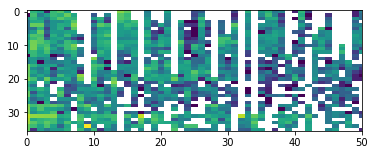

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(np.log(binned.to_numpy()))
plt.xlim([0, 50])
plt.gca().set_aspect(0.5)

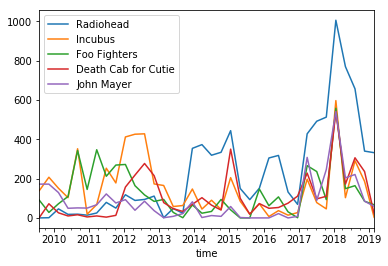

In [174]:
binned[binned.columns[0:5]].plot()

In [157]:
binned

,Radiohead,Incubus,Foo Fighters,Death Cab for Cutie,John Mayer,Weezer,The Raconteurs,The Black Keys,Young the Giant,Father John Misty,...,Manchester Orchestra,Copeland,Conrad von der Goltz & Jan Polacek & Kirste Hjort,Con Bro Chill,Marc Broussard,Maurizio Pollini,Mike Posner,Minus the Bear,Mona,"""Weird Al"" Yankovic"
time,,,,,,,,,,,,,,,,,,,,,
2009-07-30,0.0,139.0,90.0,2.0,172.0,265.0,78.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-11-07,1.0,207.0,28.0,72.0,172.0,129.0,357.0,91.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2010-02-15,46.0,151.0,72.0,26.0,129.0,280.0,155.0,143.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-05-26,18.0,103.0,109.0,10.0,49.0,45.0,81.0,276.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-09-03,19.0,352.0,343.0,16.0,51.0,114.0,98.0,496.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-12,14.0,19.0,145.0,5.0,50.0,124.0,10.0,289.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-03-22,25.0,68.0,347.0,10.0,67.0,60.0,87.0,84.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-06-30,79.0,253.0,212.0,4.0,122.0,52.0,171.0,44.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-08,50.0,178.0,269.0,13.0,76.0,94.0,38.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
